# Visualizing trends

When making scatter plots or time series, we are often more interested in the overarching trend of the data than in the specific detail of where each individual data point lies.

By drawing the trend on top of or instead of the actual data points, usually in the form of a straight or curved line, we can create a visualization that helps the reader immediately see key features of the data.

There are two fundamental approaches to determining a trend: [1] smooth the data by some method, such as a moving average, [2] fit a curve with a defined functional form and then draw the fitted curve.

## Smoothing the data
### #1 The mean method: moving average

The idea is to compute the mean for each period of a time series (an interval of a data range), and then plot the means instead of indivisual data points. See notebook 10: rolling() and and resample()
### #2 Fit a curve with a function
#### Regression
#### Lowess
#### Log
#### User-defined functions
#### log scale

In [53]:
# libraries
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

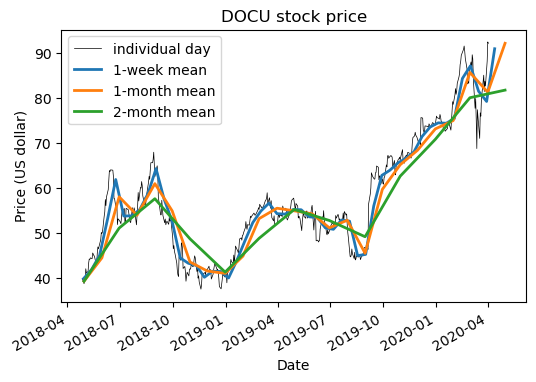

In [25]:
#1 The mean method
#which lines look better for the trend

ALPHA = 0.7
df_docu = pd.read_csv("./data/DOCU.csv")

fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot()

df_docu['Date'] = pd.to_datetime(df_docu['Date'])
df_docu.set_index('Date')['Close'].plot(ax = ax, label = 'individual day', linewidth = 0.7, color = 'black')
df_docu.set_index('Date')['Close'].resample("2W").mean().plot(ax = ax, label = '1-week mean', linewidth = 2)
df_docu.set_index('Date')['Close'].resample("M").mean().plot(ax = ax, label = '1-month mean', linewidth = 2)
df_docu.set_index('Date')['Close'].resample("2M").mean().plot(ax = ax, label = '2-month mean', linewidth = 2)

ax.set_title("DOCU stock price")
ax.set_ylabel ("Price (US dollar)")

ax.legend()



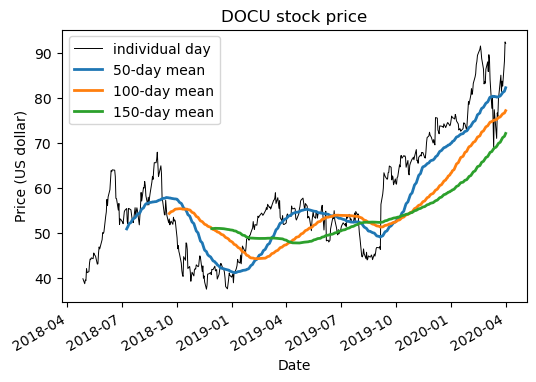

In [28]:
#1 The mean method
#which lines look better for the trend? 
#what differences between using the two mean methods? [1] using resample() and [2] using rolling()  

ALPHA = 0.7
#df_docu = pd.read_csv("./data/DOCU.csv")

fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot()

#df_docu['Date'] = pd.to_datetime(df_docu['Date'])
df_docu.set_index('Date')['Close'].plot(ax = ax, label = 'individual day', linewidth = 0.7, color = 'black')
df_docu.set_index('Date')['Close'].rolling(50).mean().plot(ax = ax, label = '50-day mean', linewidth = 2)
df_docu.set_index('Date')['Close'].rolling(100).mean().plot(ax = ax, label = '100-day mean', linewidth = 2)
df_docu.set_index('Date')['Close'].rolling(150).mean().plot(ax = ax, label = '150-day mean', linewidth = 2)

ax.set_title("DOCU stock price")
ax.set_ylabel ("Price (US dollar)")

ax.legend()



In [ ]:
#1 your turn: 
#find a good fit curve for the trend of stock price of Amazon (AMZN.csv)
#justify your answer



In [ ]:
#loading dataset
df_housing  = pd.read_csv('./data/housing/housing.csv')


<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

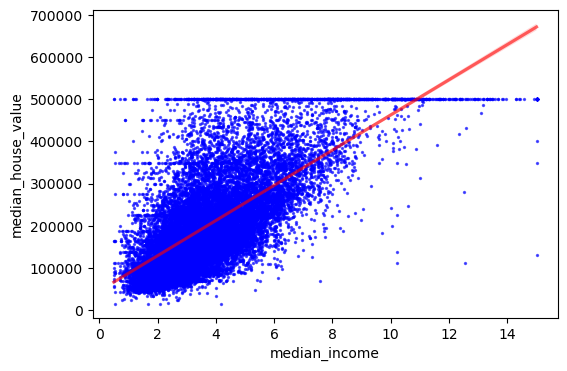

In [107]:
#2--- Regression
#--- by default regline() from seaborn use linear regression for a trend line 
ALPHA = 0.6
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot()

sns.regplot(ax = ax, x="median_income", y="median_house_value", 
            data=df_housing,
            scatter_kws={'color': 'blue', 's' : 2, 'alpha' : ALPHA}, 
            line_kws={'color': 'red', 'alpha': ALPHA})

In [113]:
#loading the real_estate dataset
#---you can get the data from here: 
#---https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction?select=Real+estate.csv
df_real_estate = pd.read_csv('./data/Real_estate.csv')
df_real_estate = df_real_estate.set_index('No')
df_real_estate

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


<AxesSubplot: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

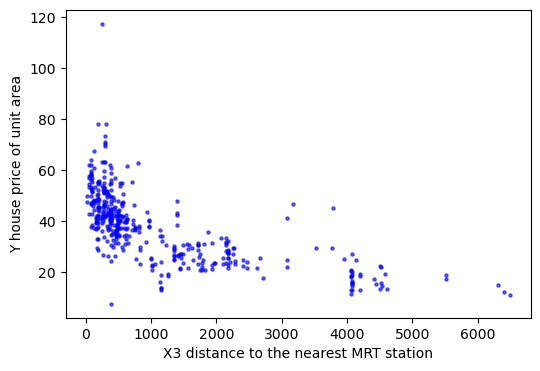

In [108]:
#2---
#--- let's scatter X3 and Y (price) and you will see that 
#--- when the distance increases, the price decreases

fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot()

df_real_estate.plot( kind = 'scatter', ax = ax, 
                    x = 'X3 distance to the nearest MRT station',
                    y = 'Y house price of unit area',
                    s = 5,
                    c = 'blue', alpha = ALPHA)
  

<AxesSubplot: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

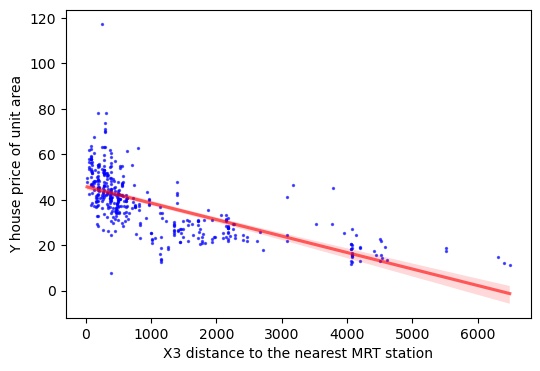

In [109]:
                  
#--- now we need to find a good curve to represent the trend we realize
#--- Try #1: regression: the linear line does not fit the scatters well

fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot()

sns.regplot(ax = ax, x='X3 distance to the nearest MRT station', 
            y="Y house price of unit area", 
            data=df_real_estate,
            scatter_kws={'color': 'blue', 's' : 2, 'alpha' : ALPHA}, 
            line_kws={'color': 'red', 'alpha': ALPHA}
            )

<AxesSubplot: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

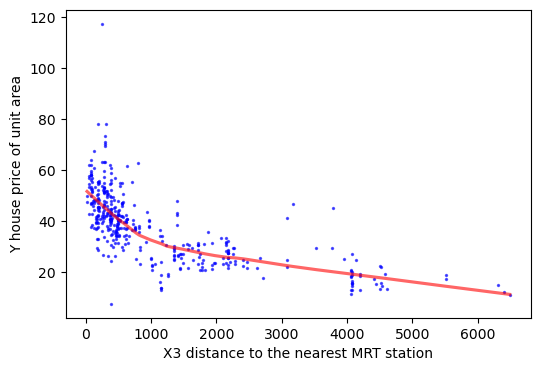

In [111]:
#--- try #2: LOWESS (locally weighted linear regression)

fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot()

sns.regplot(ax = ax, x='X3 distance to the nearest MRT station', 
            y="Y house price of unit area", 
            data=df_real_estate,             
            scatter_kws={'color': 'blue', 's' : 2, 'alpha' : ALPHA}, 
            line_kws={'color': 'red', 'alpha': ALPHA},
            lowess = True)

<AxesSubplot: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

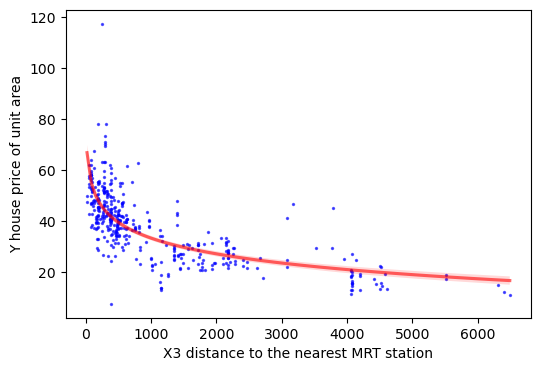

In [112]:
#--- try #3: LOG
#--- it estimates a linear regression of the form y ~ log(x)
#--- but plot x and y in the input space.

fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot()

sns.regplot(ax = ax, x='X3 distance to the nearest MRT station', 
            y="Y house price of unit area", 
            data=df_real_estate,
            scatter_kws={'color': 'blue', 's' : 2, 'alpha' : ALPHA}, 
            line_kws={'color': 'red', 'alpha': ALPHA},           
            logx = True)

(0.0, 100.0)

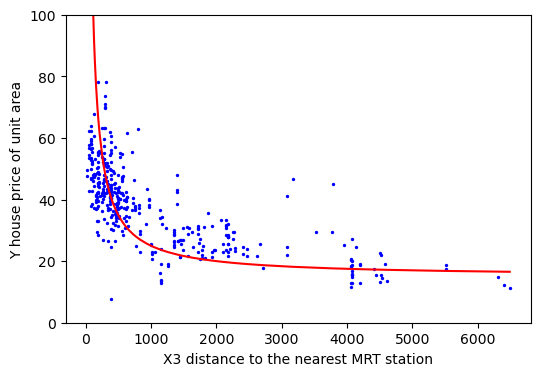

In [114]:
#--- try #4: we define our own function for y


x = df_real_estate['X3 distance to the nearest MRT station'].values
y = df_real_estate["Y house price of unit area"].values

x = np.sort(x)
y_hat = 15 + 1000* 1/(x**1/10)

fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot()

df_real_estate.plot( kind = 'scatter', ax = ax, 
                    x = 'X3 distance to the nearest MRT station',
                    y = 'Y house price of unit area',
                    s = 2,
                    c = 'blue')

ax.plot(x, y_hat, color = 'red')
ax.set_ylim([0, 100])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


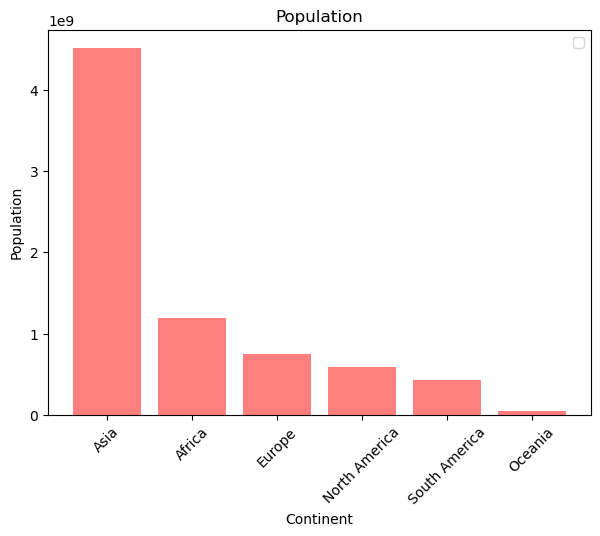

In [99]:
#2---logarithmic scale
#---visit this link for detail https://en.wikipedia.org/wiki/Logarithmic_scale
#---Logarithmic scales are useful when the data you are displaying 
#---is much less or much more than the rest of the data or 
#---when the percentage differences between values are important.

#---let's take a look at this bar plot

df = pd.read_csv('./data/continents.csv')
df = df.sort_values('Population', ascending = False)

fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot()

ax.bar(x = np.arange(1, df.shape[0] + 1), height = df['Population'], color="red", alpha = 0.5);

ax.set_title("Population")
ax.set_xlabel("Continent")
ax.set_ylabel("Population")

ax.set_xticks(np.arange(1, df.shape[0]+1))
ax.set_xticklabels(df['Continent'], rotation = 45)

ax.legend(loc = 'best')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


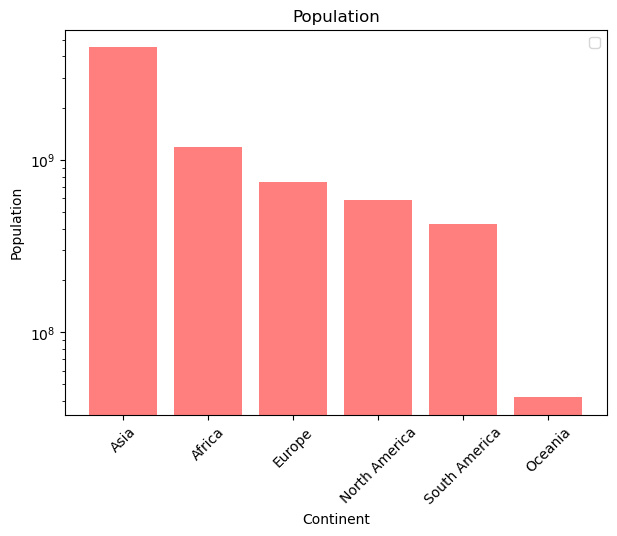

In [100]:
#--- we see the population of Asia is much larger than 
#--- the populations of others
#--- 
fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot()

ax.bar(x = np.arange(1, df.shape[0] + 1), height = df['Population'], color="red", alpha = 0.5);

ax.set_yscale("log")

ax.set_title("Population")
ax.set_xlabel("Continent")
ax.set_ylabel("Population")

ax.set_xticks(np.arange(1, df.shape[0]+1))
ax.set_xticklabels(df['Continent'], rotation = 45)

ax.legend(loc = 'best')



In [ ]:
#2--- your turn
#--- find a good fit curve to represent the relationship between X2 and Y 
#---in the real_estate dataset trend using 
#--- the following techniques 
#### Regression
#### Lowess
#### Log
#### User-defined functions


<AxesSubplot: xlabel='X2 house age', ylabel='Y house price of unit area'>

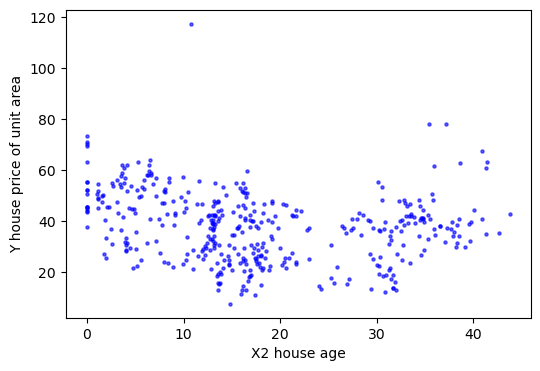

In [115]:
#2---
#--- let's scatter X2 and Y (price) and you will see that 
#--- when the distance increases, the price decreases

fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot()

df_real_estate.plot( kind = 'scatter', ax = ax, 
                    x = 'X2 house age',
                    y = 'Y house price of unit area',
                    s = 5,
                    c = 'blue', alpha = ALPHA)
  